<a href="https://colab.research.google.com/github/Ben-tech254/Neural-Network-projects/blob/main/Handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
!pip install tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
#Data Preprocessing
#1. Reshaping the data to 28 by 28 images in 1 vector and normalize the values from (0 - 255) to (0 - 1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Defining the neural architecture
model = Sequential()
model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compiling the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Training the model
model.fit(X_train, y_train, epochs = 5, batch_size = 128, validation_split= 0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8193 - loss: 0.6616 - val_accuracy: 0.9392 - val_loss: 0.2151
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9409 - loss: 0.2033 - val_accuracy: 0.9523 - val_loss: 0.1653
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9575 - loss: 0.1476 - val_accuracy: 0.9622 - val_loss: 0.1322
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9694 - loss: 0.1057 - val_accuracy: 0.9672 - val_loss: 0.1139
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9751 - loss: 0.0866 - val_accuracy: 0.9694 - val_loss: 0.1035


In [ ]:
#Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy : {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1112
Loss : 0.09828674048185349
Accuracy : 0.9722999930381775


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


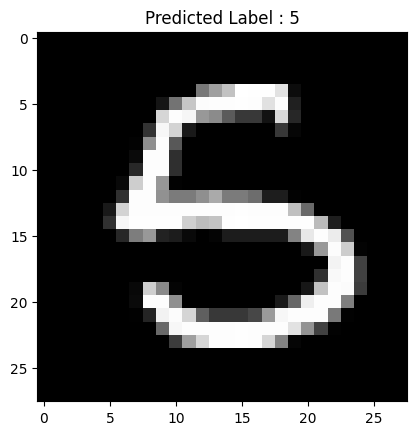

In [ ]:
#Making predictions
predictions = model.predict(X_test)

plt.imshow(X_test[319].reshape(28, 28), cmap = 'gray')
plt.title(f"Predicted Label : {np.argmax(predictions[319])}")
plt.show()